In [1]:
import tensorflow as tf
import cv2
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import pandas as pd
np.random.seed(42)
import statistics
from statistics import mode
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
import random 
from keras.preprocessing.image import ImageDataGenerator
from random import randrange
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing import image
from keras.layers import Activation, Flatten, Dropout, BatchNormalization
from keras.applications.resnet50 import preprocess_input

In [11]:
def loss_fn2(y_true,y_pred):
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    loss = 0
    loss -= (positive_weights['blur0']**y_true[0]*K.log(y_pred[0])) 
    loss -= (positive_weights['blur1']**y_true[1]*K.log(y_pred[1])) 
    loss -= (positive_weights['blur2']**y_true[2]*K.log(y_pred[2]))
    loss -= (positive_weights['blur3']**y_true[3]*K.log(y_pred[3])) 
    return loss
def loss_fn1(y_true,y_pred):
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    loss = 0
    loss -= (positive_weights['gamma0']**(y_true[0]*K.log(y_pred[0]))) 
    loss -= (positive_weights['gamma1']**y_true[1]*K.log(y_pred[1]))
    loss -= (positive_weights['gamma2']**y_true[2]*K.log(y_pred[2])) 
    loss -= (positive_weights['gamma3']**y_true[3]*K.log(y_pred[3])) 
    return loss
def mcc(y_true, y_pred):
    y_pred = keras_better_to_categorical(y_pred)
    confusion_m = tf.matmul(K.transpose(y_true), y_pred)
    return keras_calculate_mcc_from_conf(confusion_m)
def final_quality(final_blur,final_gamma):
    if final_blur=='No blur' and final_gamma=='Perfect lighting':
        print("good quality")
    else:
        print("poor quality")
def extract_label(label_list, pred_array):
    pred_max = pred_array.argmax()
    
    return label_list[pred_max]
def get_model_name(k):
    return 'modelpatchrun3resnet91fold_'+str(k)+'.h5'

In [14]:
save_dir = 'C:/Users/ammur/coding/trial/models/saved_model1_9/'
blur=['blur0','blur1','blur2','blur3']
blurp = ['No blur', 'Slight blur','Medium blur','Highly blurred']
gamma = ['gamma0','gamma1','gamma2','gamma3']
gammap = ['Perfect lighting','Very bright image','Bright image','Dark image']

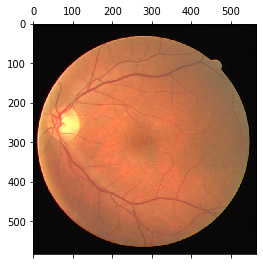

Perfect lighting with a confidence score of 0.9137956
No blur with a confidence score of 0.8476661
Hence the image is predicted as good quality


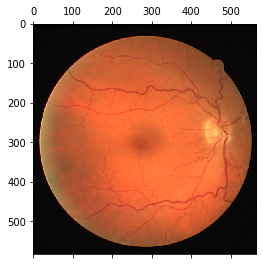

Perfect lighting with a confidence score of 0.91507095
No blur with a confidence score of 0.85263395
Hence the image is predicted as good quality


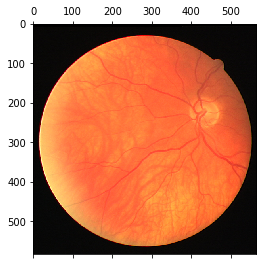

Perfect lighting with a confidence score of 0.9065428
No blur with a confidence score of 0.8415959
Hence the image is predicted as good quality


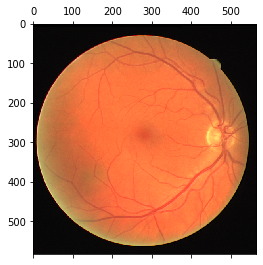

Perfect lighting with a confidence score of 0.90909946
No blur with a confidence score of 0.8419441
Hence the image is predicted as good quality


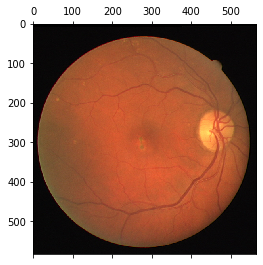

Perfect lighting with a confidence score of 0.90997624
No blur with a confidence score of 0.84482604
Hence the image is predicted as good quality


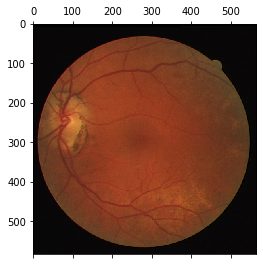

Perfect lighting with a confidence score of 0.91388726
No blur with a confidence score of 0.84905934
Hence the image is predicted as good quality


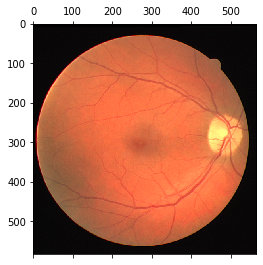

Perfect lighting with a confidence score of 0.9124673
No blur with a confidence score of 0.84440637
Hence the image is predicted as good quality


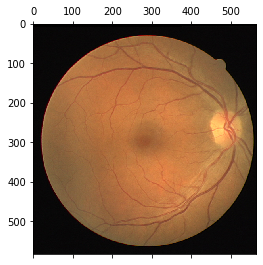

Perfect lighting with a confidence score of 0.91540027
No blur with a confidence score of 0.85230136
Hence the image is predicted as good quality


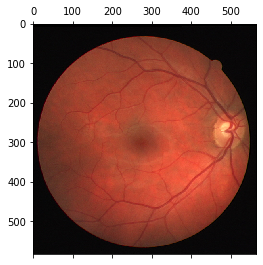

Perfect lighting with a confidence score of 0.919781
No blur with a confidence score of 0.85653794
Hence the image is predicted as good quality


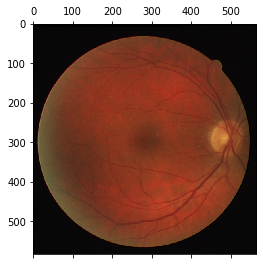

Perfect lighting with a confidence score of 0.9032025
No blur with a confidence score of 0.8393514
Hence the image is predicted as good quality


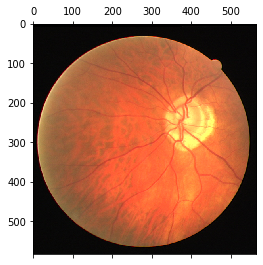

Perfect lighting with a confidence score of 0.9020059
No blur with a confidence score of 0.837298
Hence the image is predicted as good quality


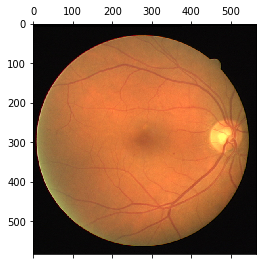

Perfect lighting with a confidence score of 0.90936595
No blur with a confidence score of 0.84238744
Hence the image is predicted as good quality


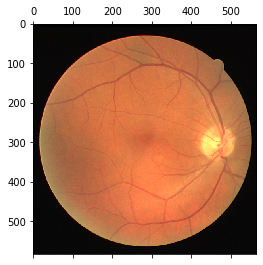

Perfect lighting with a confidence score of 0.9126557
No blur with a confidence score of 0.8464784
Hence the image is predicted as good quality


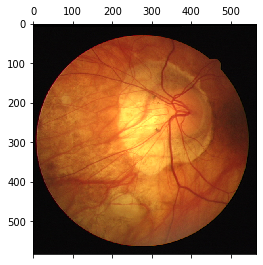

Perfect lighting with a confidence score of 0.90638286
No blur with a confidence score of 0.8388694
Hence the image is predicted as good quality


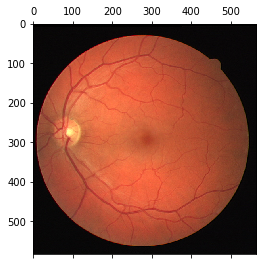

Perfect lighting with a confidence score of 0.9181119
No blur with a confidence score of 0.857623
Hence the image is predicted as good quality


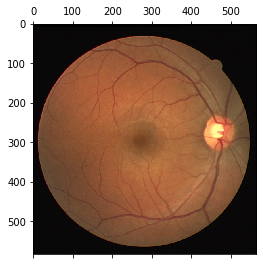

Perfect lighting with a confidence score of 0.9066746
No blur with a confidence score of 0.837672
Hence the image is predicted as good quality


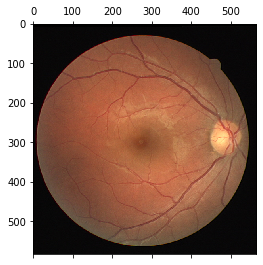

Perfect lighting with a confidence score of 0.9006138
No blur with a confidence score of 0.8358908
Hence the image is predicted as good quality


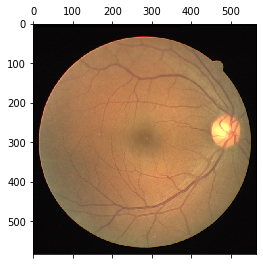

Perfect lighting with a confidence score of 0.9115772
No blur with a confidence score of 0.84486574
Hence the image is predicted as good quality


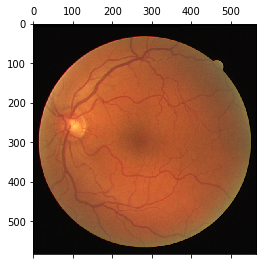

Perfect lighting with a confidence score of 0.91237956
No blur with a confidence score of 0.84684294
Hence the image is predicted as good quality


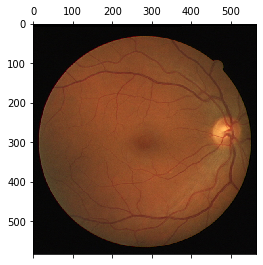

Perfect lighting with a confidence score of 0.90728784
No blur with a confidence score of 0.84330356
Hence the image is predicted as good quality


In [40]:
##quality assessment code which takes the folder containing the images as input and displays output for all images in the folder

fold_var=0
model = load_model(save_dir+get_model_name(fold_var), custom_objects={'loss_fn1':loss_fn1,'loss_fn2':loss_fn2,'mcc':mcc})
q=[]
pred=[]
pred_g=[]
final_b=[]
final_g=[]

image_list = glob.glob(os.path.join('C:/Users/ammur/coding/datasets_fundus/public1-master/images_drive/', '*.tif'))
# 'images_drive' is the folder with .tif images

for i in range(len(image_list)):
    img = image.load_img(image_list[i]) #read in image
    plt.matshow(img)
    plt.show()
    
    img = image.img_to_array(img)

    patch_size=224
    patch_center = np.array([img.shape[0]/2,img.shape[1]/2])
    patch_x1 = int(patch_center[0] - patch_size / 2.)
    patch_y1 = int(patch_center[1] - patch_size / 2.)
    patch_image1 = img[patch_x1:patch_x1+patch_size, patch_y1:patch_y1+patch_size,:]
    patch_x2 = patch_x1 - patch_size
    if patch_x2<0:
        dd=-patch_x2
    else:
        dd=0
   
    patch_image2 = img[patch_x2+dd:patch_x2+dd+patch_size, patch_y1:patch_y1+patch_size,:]
    patch_x3 = patch_x1 + patch_size
    if patch_x3+patch_size>img.shape[0]:
        ddx3=img.shape[0]-patch_x3-patch_size
    else:
        ddx3=0
    patch_image3 = img[patch_x3+ddx3:patch_x3+ddx3+patch_size, patch_y1:patch_y1+patch_size,:]
    patch_y4 = patch_y1 - patch_size
    if patch_y4<0:
        dd1=-patch_y4
    else:
        dd1=0

    patch_image4 = img[patch_x2+dd:patch_x2+dd+patch_size, patch_y4+dd1:patch_y4+dd1+patch_size,:]
    patch_y5 = patch_y1 + patch_size
    if patch_y5+patch_size>img.shape[1]:
        ddy5=img.shape[1]-patch_y5-patch_size
    else:
        ddy5=0
    patch_image5 = img[patch_x3+ddx3:patch_x3+ddx3+patch_size, patch_y5+ddy5:patch_y5+ddy5+patch_size,:]
    patch_y4 = patch_y1 - patch_size
    patch_image6 = img[patch_x1:patch_x1+patch_size, patch_y4+dd1:patch_y4+dd1+patch_size,:]
    patch_y5 = patch_y1 + patch_size
    patch_image7 = img[patch_x1:patch_x1+patch_size, patch_y5+ddy5:patch_y5+ddy5+patch_size,:]
    patch_image8 = img[patch_x2+dd:patch_x2+dd+patch_size, patch_y5+ddy5:patch_y5+ddy5+patch_size,:]
    patch_image9 = img[patch_x3+ddx3:patch_x3+ddx3+patch_size, patch_y4+dd1:patch_y4+dd1+patch_size,:]

    a_list = [patch_image1,patch_image2,patch_image3,patch_image4,patch_image5,patch_image6,patch_image7,patch_image8,patch_image9]
    def condition(x): return ~np.any(x == -1)
    output = [idx for idx, element in enumerate(a_list) if condition(element)]
    pred_g=[]
    pred_b=[]
    gamma_i=[]
    blur_i=[]
    jjg=0
    jjb=0
    jj=0
    for ii in range(len(output)):
        prediction =model.predict(np.array([a_list[output[ii]]]))
        if prediction[0].max()>=0.1 and prediction[1].max()>=0.1:

            pred_g.append(prediction[0])
            pred_b.append(prediction[1])  
            jj=jj+1
        else:
            pred_g.append(np.array([[0,0,0,0]]))
            pred_b.append(np.array([[0,0,0,0]]))
    pred_b1=(pred_b[0]+pred_b[1]+pred_b[2]+pred_b[3]+pred_b[4]+pred_b[5]+pred_b[6]+pred_b[7]+pred_b[8])/jj
    pred_g1=(pred_g[0]+pred_g[1]+pred_g[2]+pred_g[3]+pred_g[4]+pred_g[5]+pred_g[6]+pred_g[7]+pred_g[8])/jj
    final_gamma=extract_label(gammap, pred_g1)
    final_blur=extract_label(blurp, pred_b1)
    print(final_gamma,end=" ")
    print("with a confidence score of",end=" ")
    print(pred_g1.max())
    print(final_blur,end=" ")
    print("with a confidence score of",end=" ")
    print(pred_b1.max())
    print('Hence the image is predicted as',end=" ")
    final_quality(final_blur,final_gamma)

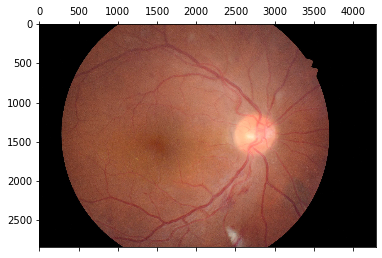

Perfect lighting with a confidence score of 0.8885339
No blur with a confidence score of 0.79056996
Hence the image is predicted as good quality


In [37]:
##quality assessment code which takes the path of one image file as input

fold_var=0
model = load_model(save_dir+get_model_name(fold_var), custom_objects={'loss_fn1':loss_fn1,'loss_fn2':loss_fn2,'mcc':mcc})
q=[]
pred=[]
pred_g=[]
final_b=[]
final_g=[]


img = image.load_img('C:/Users/ammur/coding/datasets_fundus/public1-master/images_idrid/IDRiD_23.jpg') #read in the image

plt.matshow(img)
plt.show()
img = image.img_to_array(img)


patch_size=224
patch_center = np.array([img.shape[0]/2,img.shape[1]/2])
patch_x1 = int(patch_center[0] - patch_size / 2.)
patch_y1 = int(patch_center[1] - patch_size / 2.)
patch_image1 = img[patch_x1:patch_x1+patch_size, patch_y1:patch_y1+patch_size,:]
patch_x2 = patch_x1 - patch_size
if patch_x2<0:
    dd=-patch_x2
else:
    dd=0

patch_image2 = img[patch_x2+dd:patch_x2+dd+patch_size, patch_y1:patch_y1+patch_size,:]
patch_x3 = patch_x1 + patch_size
if patch_x3+patch_size>img.shape[0]:
    ddx3=img.shape[0]-patch_x3-patch_size
else:
    ddx3=0
patch_image3 = img[patch_x3+ddx3:patch_x3+ddx3+patch_size, patch_y1:patch_y1+patch_size,:]
patch_y4 = patch_y1 - patch_size
if patch_y4<0:
    dd1=-patch_y4
else:
    dd1=0

patch_image4 = img[patch_x2+dd:patch_x2+dd+patch_size, patch_y4+dd1:patch_y4+dd1+patch_size,:]
patch_y5 = patch_y1 + patch_size
if patch_y5+patch_size>img.shape[1]:
    ddy5=img.shape[1]-patch_y5-patch_size
else:
    ddy5=0
patch_image5 = img[patch_x3+ddx3:patch_x3+ddx3+patch_size, patch_y5+ddy5:patch_y5+ddy5+patch_size,:]
patch_y4 = patch_y1 - patch_size
patch_image6 = img[patch_x1:patch_x1+patch_size, patch_y4+dd1:patch_y4+dd1+patch_size,:]
patch_y5 = patch_y1 + patch_size
patch_image7 = img[patch_x1:patch_x1+patch_size, patch_y5+ddy5:patch_y5+ddy5+patch_size,:]
patch_image8 = img[patch_x2+dd:patch_x2+dd+patch_size, patch_y5+ddy5:patch_y5+ddy5+patch_size,:]
patch_image9 = img[patch_x3+ddx3:patch_x3+ddx3+patch_size, patch_y4+dd1:patch_y4+dd1+patch_size,:]

a_list = [patch_image1,patch_image2,patch_image3,patch_image4,patch_image5,patch_image6,patch_image7,patch_image8,patch_image9]
def condition(x): return ~np.any(x == -1)
output = [idx for idx, element in enumerate(a_list) if condition(element)]
pred_g=[]
pred_b=[]
gamma_i=[]
blur_i=[]
jjg=0
jjb=0
jj=0
for ii in range(len(output)):
    prediction =model.predict(np.array([a_list[output[ii]]]))
    if prediction[0].max()>=0.1 and prediction[1].max()>=0.1:

        pred_g.append(prediction[0])
        pred_b.append(prediction[1])  
        jj=jj+1
    else:
        pred_g.append(np.array([[0,0,0,0]]))
        pred_b.append(np.array([[0,0,0,0]]))
pred_b1=(pred_b[0]+pred_b[1]+pred_b[2]+pred_b[3]+pred_b[4]+pred_b[5]+pred_b[6]+pred_b[7]+pred_b[8])/jj
pred_g1=(pred_g[0]+pred_g[1]+pred_g[2]+pred_g[3]+pred_g[4]+pred_g[5]+pred_g[6]+pred_g[7]+pred_g[8])/jj
final_gamma=extract_label(gammap, pred_g1)
final_blur=extract_label(blurp, pred_b1)
print(final_gamma,end=" ")
print("with a confidence score of",end=" ")
print(pred_g1.max())
print(final_blur,end=" ")
print("with a confidence score of",end=" ")
print(pred_b1.max())
print('Hence the image is predicted as',end=" ")
final_quality(final_blur,final_gamma)